In [ ]:
#Because using the GPU Runtime Type for this case on Google Collab does not give us enough space for importing and unzipping file, which lead us to set as default
#Install Kaggle and import dataset
#upgrade the newest pip
!pip install --upgrade pip

     |████████████████████████████████| 1.6MB 9.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
#It have to be the newest Kaggle version for the import
!pip install kaggle==1.5.6

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 58 kB 3.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=399ca7252630a2d4eb4bab0af130c6924e893ac2d33963ddf62be82aa970da51
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
  distutils: /usr/local/lib/python3.7/dist-packages
  sysconfig: /usr/lib/python3.7/site-packages
  

In [ ]:
#before import dataset from kaggel we need to Create an API key from Kaggle account in order to use and upload it on Collab
#the API key is already uploaded on the share Drive

In [ ]:
from google.colab import files

files.upload()

#Choose the kaggle.json file that you downloaded (which includes the API key)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tobynguyen","key":"f3bd80ad6488afd672cf65f32559cc49"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#Make directory named kaggle and copy kaggle.json file there.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
#Change the permissions of the file.

In [ ]:
! kaggle datasets list
#check if everything's okay by running this command.

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              224KB  2021-04-24 17:07:26           3622        361  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           2108        213  1.0              
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            439         20  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
#import dataset from kaggle
!kaggle competitions download -c plant-pathology-2021-fgvc8

100% 14.9G/14.9G [03:10<00:00, 29.8MB/s]
100% 14.9G/14.9G [03:10<00:00, 83.9MB/s]


In [ ]:
#create a folder for unzip
!mkdir plant-pathology

In [ ]:
!unzip plant-pathology-2021-fgvc8.zip -d plant-pathology

Streaming output truncated to the last 5000 lines.
  inflating: plant-pathology/train_images/e00c97b2de4749ce.jpg  
  inflating: plant-pathology/train_images/e00df890cfe62736.jpg  
  inflating: plant-pathology/train_images/e00ed0bf43a87f25.jpg  
  inflating: plant-pathology/train_images/e00f759d65d52887.jpg  
  inflating: plant-pathology/train_images/e00f934d9e50ad5b.jpg  
  inflating: plant-pathology/train_images/e00fce341cb63da5.jpg  
  inflating: plant-pathology/train_images/e010c7c35ecf3d1c.jpg  
  inflating: plant-pathology/train_images/e01112939f783fec.jpg  
  inflating: plant-pathology/train_images/e01592da4d71b8be.jpg  
  inflating: plant-pathology/train_images/e0189acaf8cf80fd.jpg  
  inflating: plant-pathology/train_images/e0189e4999bdd0fa.jpg  
  inflating: plant-pathology/train_images/e01ae16d4a759cb5.jpg  
  inflating: plant-pathology/train_images/e01dc39ccb2b4ccb.jpg  
  inflating: plant-pathology/train_images/e01e42d90c66f3f3.jpg  
  inflating: plant-pathology/train_imag

In [ ]:
!ls

history_improvement.pkl  plant-pathology-2021-fgvc8.zip  sample_data
kaggle.json		 Plant_pathology.hdf5
plant-pathology		 Plant_pathology_VGG16.h5


In [ ]:
#import packages and library
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2, ResNet50, Xception
import cv2
from PIL import Image

In [ ]:
#create path file
path = 'plant-pathology/'
train_dir = path + 'train_images/'
test_dir = path + 'test_images/'

In [ ]:
df = pd.read_csv('plant-pathology/train.csv')

In [ ]:
df.head()

image                           labels
0  800113bb65efe69e.jpg                          healthy
1  8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex
2  80070f7fb5e2ccaa.jpg                             scab
3  80077517781fb94f.jpg                             scab
4  800cbf0ff87721f8.jpg                          complex

In [ ]:
df.labels.value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

In [ ]:
df['labels'].unique()

array(['healthy', 'scab frog_eye_leaf_spot complex', 'scab', 'complex',
       'rust', 'frog_eye_leaf_spot', 'powdery_mildew',
       'scab frog_eye_leaf_spot', 'frog_eye_leaf_spot complex',
       'rust frog_eye_leaf_spot', 'powdery_mildew complex',
       'rust complex'], dtype=object)

In [ ]:
df['labels'] = df['labels'].astype(str)

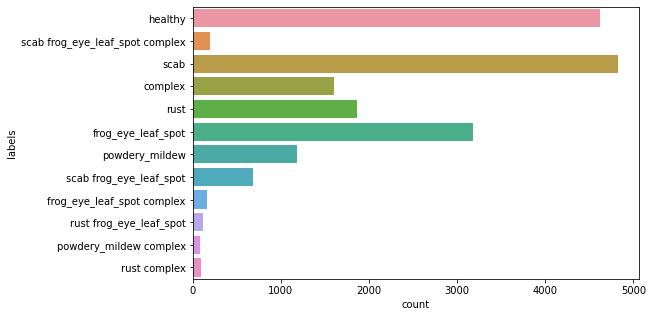

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data = df,y='labels')

In [ ]:
def plot_examples(label):
    fig, ax = plt.subplots(1, 5, figsize=(25, 15))
    ax = ax.ravel()
    for i in range(5):
        idx = df[df['labels']==label].index[i]
        image = cv2.imread(train_dir+df.loc[idx, 'image'])     
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax[i].imshow(image)
        ax[i].set_title(label)
        ax[i].set_xticklabels([])
        ax[i].set_yticklabels([])

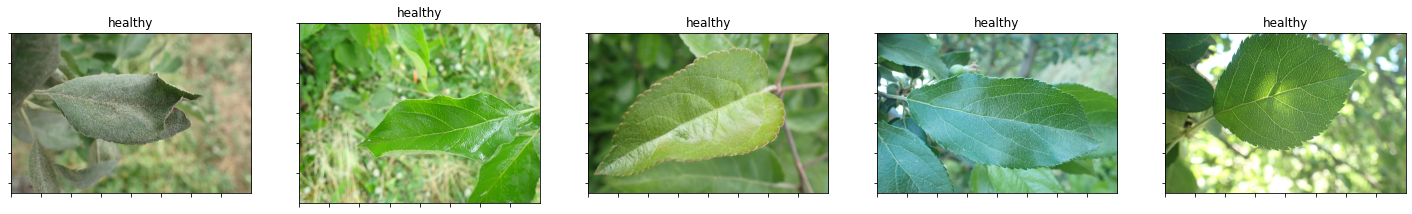

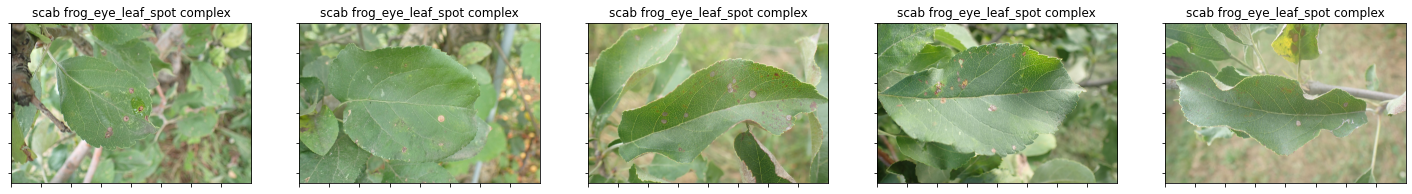

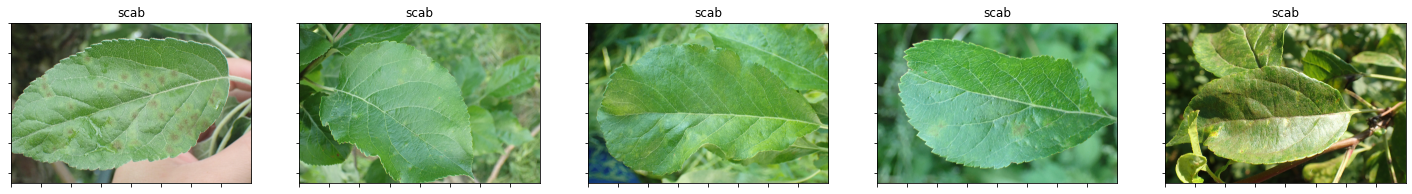

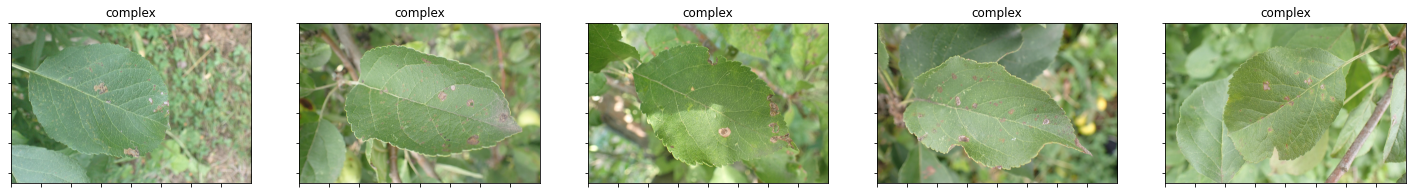

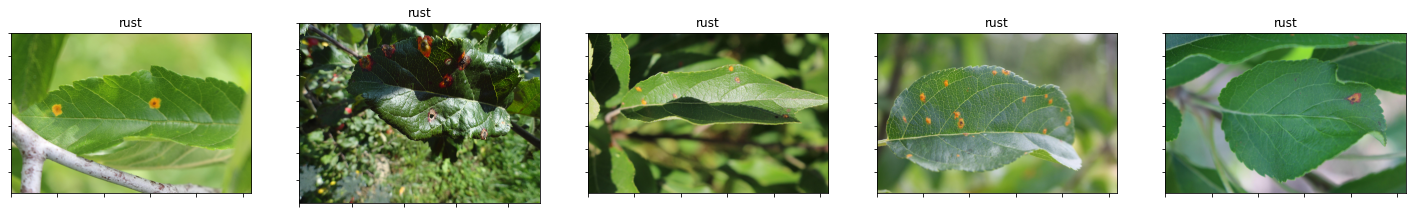

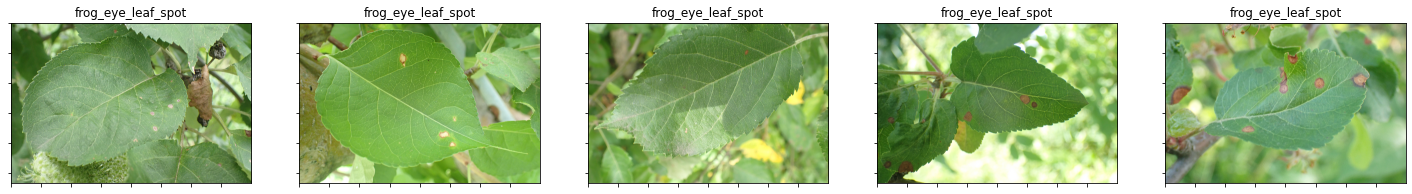

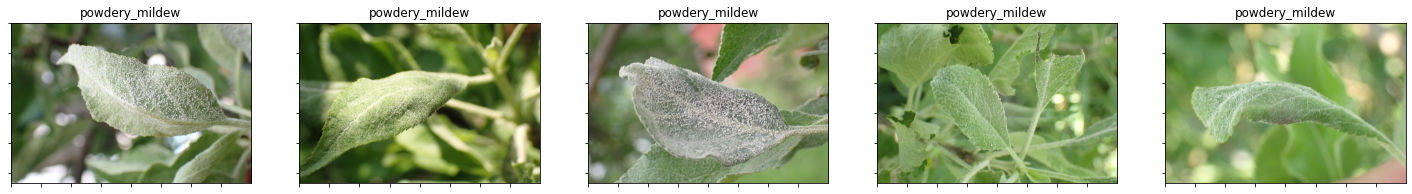

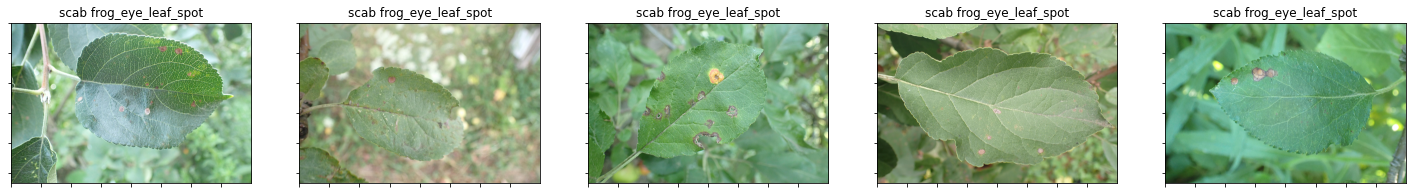

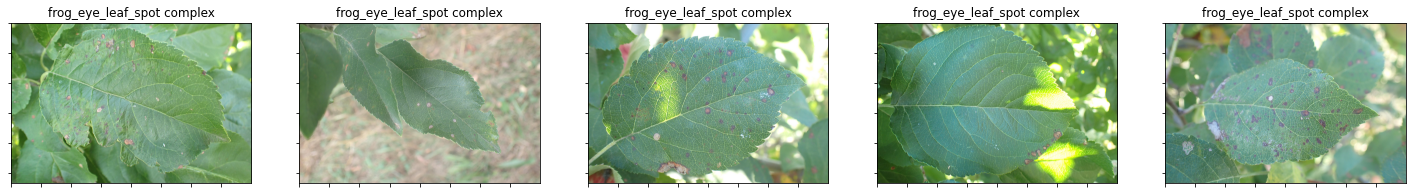

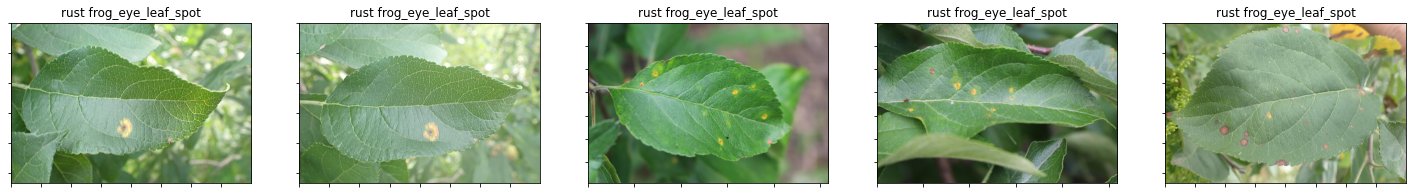

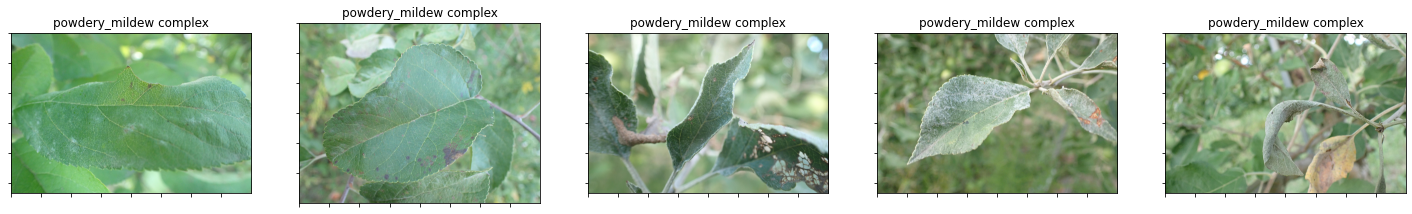

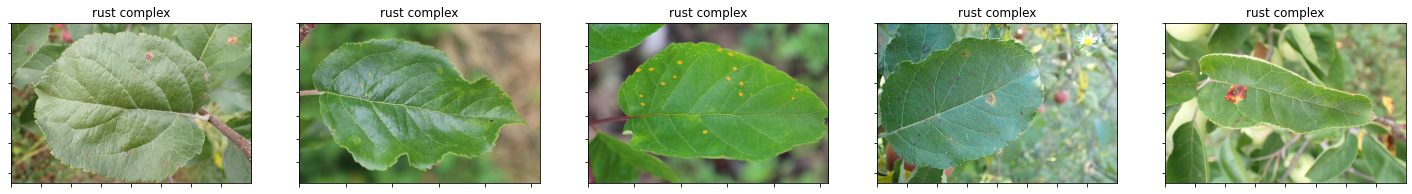

In [ ]:
for labels in list(df['labels'].unique()):
    plot_examples(labels)


In [ ]:
#Converting to multi-label problem
count_dict = df.labels.value_counts()
label2id = {
    'scab': 0,
    'frog_eye_leaf_spot' : 1,
    'rust' : 2,
    'complex' : 3,
    'powdery_mildew' : 4,
}
NUM_CLASS = len(label2id)
id2label = dict([(value, key) for key, value in label2id.items()])
df["labels"] = df["labels"].map(lambda x : [i for i in x.split(" ") if i != "healthy"])
df["labels"] = df["labels"].map(lambda x : [label2id[i] for i in x])
df.head()

image     labels
0  800113bb65efe69e.jpg         []
1  8002cb321f8bfcdf.jpg  [0, 1, 3]
2  80070f7fb5e2ccaa.jpg        [0]
3  80077517781fb94f.jpg        [0]
4  800cbf0ff87721f8.jpg        [3]

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(dataframe = df,
                                                   directory = train_dir,
                                                   target_size = (64,64),
                                                   x_col = 'image',
                                                   y_col = 'labels',
                                                   batch_size = 128,
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   subset = 'training')

test_generator = test_datagen.flow_from_dataframe(dataframe = df,
                                                 directory = train_dir,
                                                 target_size = (64,64),
                                                 x_col = 'image',
                                                 y_col = 'labels',
                                                 batch_size = 128,
                                                 color_mode = 'rgb',
                                                 class_mode = 'categorical',
                                                 subset = 'validation')

Found 14906 validated image filenames belonging to 5 classes.
Found 3726 validated image filenames belonging to 5 classes.


In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 4 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 5 - Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Step 6 - Flattening
classifier.add(Flatten())

""" New Layer Dropout """
classifier.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier.summary()

classifier.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0

In [ ]:
history = classifier.fit(train_generator,
      steps_per_epoch=50,
      epochs=10,
      validation_data=test_generator)

Epoch 1/10
50/50 [==============================] - 1434s 29s/step - loss: 0.4838 - accuracy: 0.7903 - val_loss: 0.4509 - val_accuracy: 0.8311
Epoch 2/10
50/50 [==============================] - 1379s 28s/step - loss: 0.4479 - accuracy: 0.8317 - val_loss: 0.4527 - val_accuracy: 0.8311
Epoch 3/10
50/50 [==============================] - 1367s 28s/step - loss: 0.4403 - accuracy: 0.8363 - val_loss: 0.4538 - val_accuracy: 0.8311
Epoch 4/10
50/50 [==============================] - 1390s 28s/step - loss: 0.4452 - accuracy: 0.8331 - val_loss: 0.4557 - val_accuracy: 0.8311
Epoch 5/10
50/50 [==============================] - 1389s 28s/step - loss: 0.4454 - accuracy: 0.8325 - val_loss: 0.4488 - val_accuracy: 0.8311
Epoch 6/10
50/50 [==============================] - 1378s 28s/step - loss: 0.4468 - accuracy: 0.8322 - val_loss: 0.4530 - val_accuracy: 0.8311
Epoch 7/10
50/50 [==============================] - 1373s 28s/step - loss: 0.4422 - accuracy: 0.8361 - val_loss: 0.4500 - val_accuracy: 0.8311

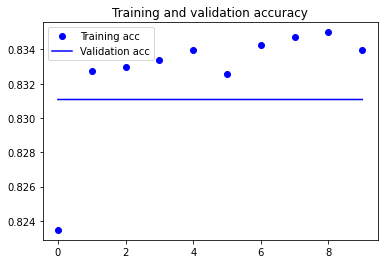

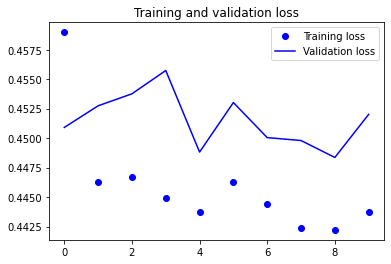

In [ ]:
# Let's plot our results again:
import pickle
filehandler = open('history_improvement.pkl', 'wb') 
pickle.dump(history.history, filehandler)
with open('history_improvement.pkl', 'rb') as pickle_file:
  content = pickle.load(pickle_file)

acc = content['accuracy']
val_acc = content['val_accuracy']
loss = content['loss']
val_loss = content['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
classifier.save('Plant_pathology.hdf5')

In [ ]:
from keras.models import load_model
classifier_load = load_model('Plant_pathology.hdf5')
print(classifier.evaluate(train_generator))
print(classifier.evaluate(test_generator))

117/117 [==============================] - 1937s 17s/step - loss: 0.4433 - accuracy: 0.8334
[0.4432780146598816, 0.8334094285964966]
30/30 [==============================] - 480s 16s/step - loss: 0.4520 - accuracy: 0.8311
[0.45201408863067627, 0.8310789465904236]


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier1 = Sequential()         
         
# load model
model = VGG16(include_top=False, input_shape=(64, 64, 3))

# mark loaded layers as not trainable !Don't change the weights in VGG16
for layer in model.layers:
    layer.trainable = False

# Add VGG16 into your CNN
classifier1.add(model)

# Step 6 - Flattening
classifier1.add(Flatten())

""" New Layer Dropout """
classifier1.add(Dropout(0.5))

# Step 7 - Full connection layer
classifier1.add(Dense(units = 128, activation = 'relu'))

# Step 8 - Output Layer
classifier1.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Show Model Summary
classifier1.summary()

classifier1.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 14,977,089
Trainable params: 262,401
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = classifier1.fit(train_generator,
      steps_per_epoch=50,
      epochs=10,
      validation_data=test_generator)

# Let's save our model -- we will be using it in the section on convnet visualization.
classifier.save('Plant_pathology_VGG16.h5')

Epoch 1/10
50/50 [==============================] - 1351s 27s/step - loss: 0.6004 - accuracy: 0.7750 - val_loss: 0.4549 - val_accuracy: 0.8311
Epoch 2/10
50/50 [==============================] - 1313s 26s/step - loss: 0.4599 - accuracy: 0.8309 - val_loss: 0.4517 - val_accuracy: 0.8311
Epoch 3/10
50/50 [==============================] - 1294s 26s/step - loss: 0.4527 - accuracy: 0.8338 - val_loss: 0.4509 - val_accuracy: 0.8311
Epoch 4/10
50/50 [==============================] - 1316s 27s/step - loss: 0.4505 - accuracy: 0.8334 - val_loss: 0.4513 - val_accuracy: 0.8311
Epoch 5/10
50/50 [==============================] - 1323s 27s/step - loss: 0.4475 - accuracy: 0.8345 - val_loss: 0.4541 - val_accuracy: 0.8311
Epoch 6/10
50/50 [==============================] - 1291s 26s/step - loss: 0.4465 - accuracy: 0.8352 - val_loss: 0.4527 - val_accuracy: 0.8311
Epoch 7/10
50/50 [==============================] - 1279s 26s/step - loss: 0.4514 - accuracy: 0.8312 - val_loss: 0.4505 - val_accuracy: 0.8311

In [ ]:
classifier1_load = load_model('Plant_pathology_VGG16.h5')
print(classifier.evaluate(train_generator))
print(classifier.evaluate(test_generator))

117/117 [==============================] - 2039s 17s/step - loss: 0.4433 - accuracy: 0.8334
[0.4432828724384308, 0.8334094882011414]
30/30 [==============================] - 498s 17s/step - loss: 0.4520 - accuracy: 0.8311
[0.45201414823532104, 0.8310788869857788]


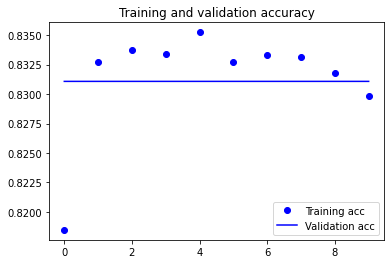

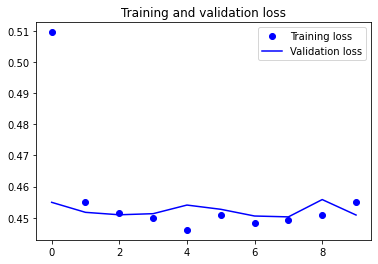

In [ ]:
# Let's plot our results again:
import pickle
filehandler = open('history_improvement_vgg16.pkl', 'wb') 
pickle.dump(history.history, filehandler)
with open('history_improvement_vgg16.pkl', 'rb') as pickle_file:
  content = pickle.load(pickle_file)

acc = content['accuracy']
val_acc = content['val_accuracy']
loss = content['loss']
val_loss = content['val_loss']

epochs = range(len(acc))

from matplotlib import pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import load_model
classifier1_load = load_model('/content/Plant_pathology_VGG16.h5')

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
from google.colab import files

img_path="/content/8291887e-e8dd-43b0-a3f5-ca91af570282.jpeg"
class_names=['healthy', 'scab frog_eye_leaf_spot complex', 'scab', 'complex',
       'rust', 'frog_eye_leaf_spot', 'powdery_mildew',
       'scab frog_eye_leaf_spot', 'frog_eye_leaf_spot complex',
       'rust frog_eye_leaf_spot', 'powdery_mildew complex',
       'rust complex']


In [ ]:
import tensorflow as tf
#resize the image (64,64)
img = image.load_img(img_path, target_size=(64, 64))
# creat a batch of one image
img_array = image.img_to_array(img)
# img_batch = np.expand_dims(img_array, axis=0)
img_batch=np.expand_dims(img_array, 0) # Create a batch
# scale the value of the pixels to a consistance range 
img_preprocessed = preprocess_input(img_batch)
# run the pre-trained model
prediction=classifier1_load.predict(img_preprocessed)

print(prediction)

score = tf.nn.softmax(prediction[0])
#display the results 
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

[[0.]]
This image most likely belongs to healthy with a 100.00 percent confidence.


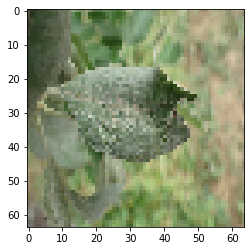

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()